In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datafile = '/content/drive/MyDrive/CodingDojo/Project1/ProjectDataSet_sales_predictions.csv'
df = pd.read_csv(datafile)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info() # to check data type and which columns has Nan values, here Item_Weight and Outlet_Size columns have Nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.duplicated().any() # to check for any duplicates

False

In [ ]:
#to locate Nan values in Item_Weight 
Nan_Values1 = pd.isnull(df['Item_Weight'])
df[Nan_Values1].head()

In [ ]:
Nan_Values1.value_counts() # to count Nan values in Item_Weight column

False    7060
True     1463
Name: Item_Weight, dtype: int64

In [ ]:
Nan_Values2 = pd.isnull(df['Outlet_Size']) #to locate Nan values in Outlet_Size column 
df[Nan_Values2].head()

In [ ]:
Nan_Values2.value_counts() # to count total Nan values in Outlet_Size column

False    6113
True     2410
Name: Outlet_Size, dtype: int64

# More than thousand values are missing in both the columns
# Since missing values are in very large number, filling missing values is better idea than dropping all of them 

In [ ]:
#filling Nan values in all NON-Object columns which is Item_Weight for this Dataframe
# We will use interpolate method to fill missing values for Item_Weight column 
# note that this method only works for int or floats
New_df=df.interpolate(method ='linear', limit_direction ='forward')
New_df.head(10)

source: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

In [ ]:
New_df.isna().sum() # Outlet_Size column still has Nan values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#filling Nan values in Outlet_Size 
final_df = New_df.fillna(method ='pad')
final_df

In [ ]:
final_df.isna().sum() # No Nan values in new dataframe

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
final_df.duplicated().any() #to check there is no duplicate rows after filling values

False

In [ ]:
final_df['Item_Fat_Content'].value_counts() #to check string inconsistency in Object column

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#to make all string consistent in the column Item Fat content
final_df.loc[final_df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
final_df.loc[final_df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
final_df.loc[final_df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

In [ ]:
final_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,14.925,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [ ]:
### Below commands used to check for any string inconsistency in respective 
###column value AND NO INCONSITETNCY OBSEVED IN ANY OBJECT COLUMN WRITTEN BELOW

#final_df['Item_Type'].value_counts() 
#final_df['Outlet_Establishment_Year'].value_counts()
#final_df['Outlet_Size'].value_counts()
#final_df['Outlet_Location_Type'].value_counts()
#final_df['Outlet_Type'].value_counts()

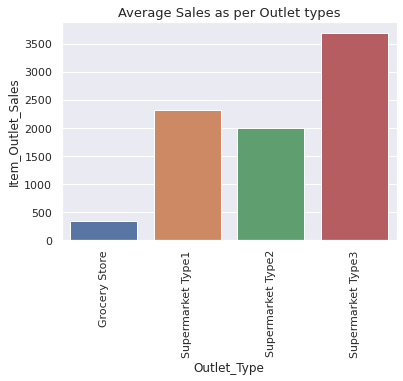

In [ ]:
#CALCULATING MEAN VALUE OF SALES AS OUTLET TYPE
sale_type_groupby = final_df.groupby(['Outlet_Type'], as_index= False)['Item_Outlet_Sales'].mean()

#plt.figure(figsize=(9,5))
sns.set_theme(style='darkgrid', context='notebook');

sns.barplot(x=sale_type_groupby['Outlet_Type'], 
            y=sale_type_groupby['Item_Outlet_Sales']);

plt.xticks(rotation=90);

plt.title("Average Sales as per Outlet types", fontsize=13);

In [ ]:
final_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

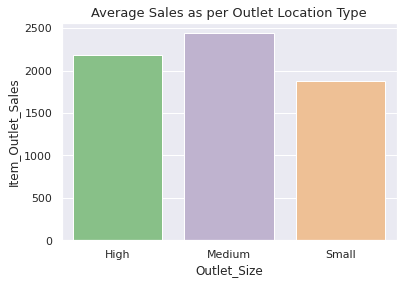

In [ ]:
#CALCULATING MEAN VALUE OF SALES AS OUTLET SIZE
sale_size_groupby = final_df.groupby(['Outlet_Size'], as_index= False)['Item_Outlet_Sales'].mean()

sns.set_theme(style='darkgrid', context='notebook');

sns.barplot(x=sale_size_groupby['Outlet_Size'], 
            y=sale_size_groupby['Item_Outlet_Sales'], 
            palette='Accent');

plt.title("Average Sales as per Outlet Location Type", 
              fontsize=13);

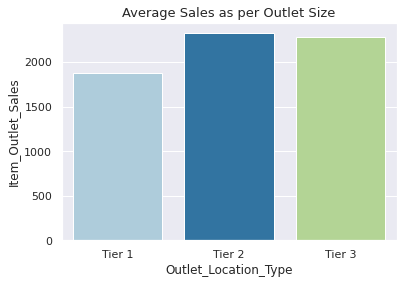

In [ ]:
#CALCULATING MEAN VALUE OF SALES AS OUTLET LOCATION
sale_location_groupby = final_df.groupby(['Outlet_Location_Type'], as_index= False)['Item_Outlet_Sales'].mean()

sns.set_theme(style='darkgrid', context='notebook');

sns.barplot(x=sale_location_groupby['Outlet_Location_Type'], 
            y=sale_location_groupby['Item_Outlet_Sales'], 
            palette='Paired');

plt.title("Average Sales as per Outlet Size", 
              fontsize=13);

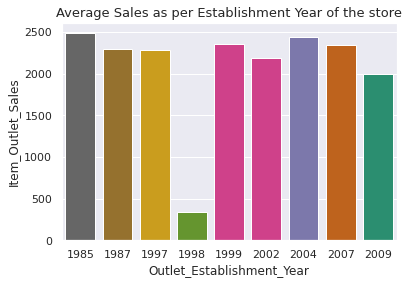

In [ ]:
sale_establishment_groupby = final_df.groupby(['Outlet_Establishment_Year'], as_index= False)['Item_Outlet_Sales'].mean()

sns.set_theme(style='darkgrid', context='notebook');
sns.barplot(x=sale_establishment_groupby['Outlet_Establishment_Year'],y=sale_establishment_groupby['Item_Outlet_Sales'],
            palette='Dark2_r');
plt.title("Average Sales as per Establishment Year of the store", 
              fontsize=13);

SO far Outlet related data have been observed

Data related to item 

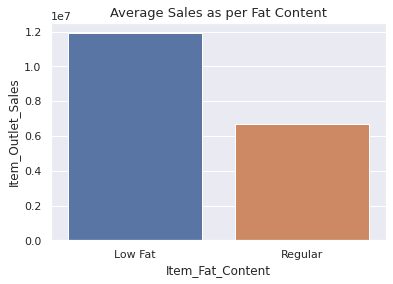

In [ ]:
#CALCULATING MEAN VALUE OF SALES AS ITEM FAT CONTENT
sale_fat_groupby = final_df.groupby(['Item_Fat_Content'], as_index= False)['Item_Outlet_Sales'].sum()

#sns.set_theme(style='darkgrid', context='notebook'); CHECK Default theme
sns.barplot(x=sale_fat_groupby['Item_Fat_Content'], 
            y=sale_fat_groupby['Item_Outlet_Sales'], 
            palette='deep');

plt.title("Average Sales as per Fat Content", 
              fontsize=13);

In [ ]:
ItemType_groupby = final_df.groupby(['Item_Type'], as_index=False)['Item_Outlet_Sales'].sum().sort_values(by='Item_Outlet_Sales', ascending = False)

In [ ]:
maxItemtypesale = ItemType_groupby['Item_Outlet_Sales'].max()
minItemtypesale = ItemType_groupby['Item_Outlet_Sales'].min()

print(minItemtypesale)
print(maxItemtypesale)

148868.2194
2820059.8168000015


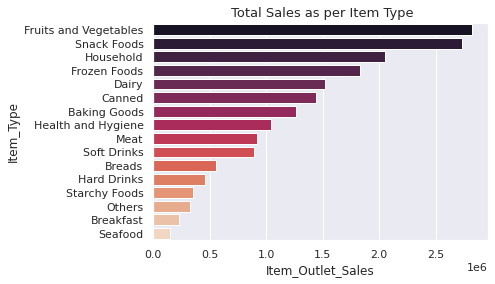

In [ ]:
#sns.set_theme(style='darkgrid', context='notebook'); CHECK Default theme
sns.barplot(x=ItemType_groupby['Item_Outlet_Sales'], 
            y=ItemType_groupby['Item_Type'], 
            palette='rocket');
#plt.ylim(0, 3000000)
#plt.xticks(rotation=90);
plt.title(" Total Sales as per Item Type", 
              fontsize=13);

Sales are more inclined to fruits and Vegetables and snack foods and less to seafood 

In [ ]:
final_df.groupby(['Item_Type', 'Item_Identifier'],as_index=False)['Item_Outlet_Sales'].sum().sort_values(by='Item_Outlet_Sales', 
                                                                                         ascending = False).head(20)
#pending work - provide Item type in graph over bars

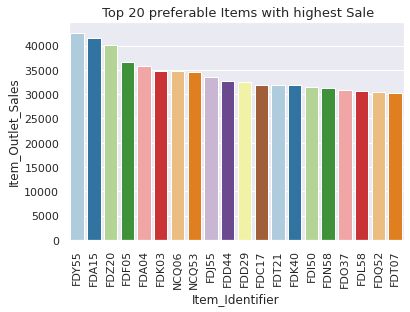

In [ ]:
ItemID_groupby = final_df.groupby(['Item_Identifier'], 
                                  as_index=False)['Item_Outlet_Sales'].sum().sort_values(by='Item_Outlet_Sales', 
                                                                                         ascending = False).head(20)

sns.barplot(x=ItemID_groupby['Item_Identifier'], 
            y=ItemID_groupby['Item_Outlet_Sales'], 
            palette='Paired');

plt.xticks(rotation=90);
plt.title(" Top 20 preferable Items with highest Sale", 
              fontsize=13);

In [ ]:
ItemVis = final_df[['Item_Visibility', 'Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']]


In [ ]:
#sns.regplot(x=df["sepal_length"], y=df["sepal_width"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

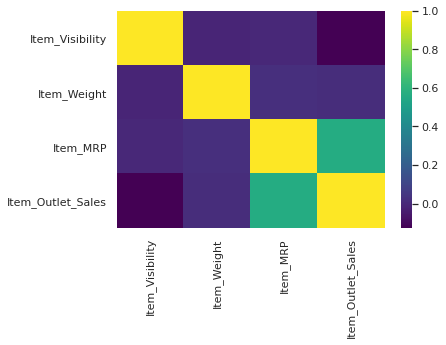

In [ ]:
corr_matrix=ItemVis.corr()
sns.heatmap(corr_matrix, cmap='viridis')
#ItemVis_norm_col=(ItemVis-ItemVis.mean())/ItemVis.std()
#sns.heatmap(ItemVis_norm_col, cmap='viridis')
plt.show()

In [ ]:
plt.figure(figsize=(8,4))

# get correlation between values (this is peasons correlation if you are familiar)
corr = sales.corr()
# mask to get rid of top half
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# with mask
# sns.heatmap(corr, cmap='Blues', annot=True, mask=mask);

# without mask
sns.heatmap(corr, cmap='Blues', annot=True);

In [ ]:
#sns.set_theme(style='dark', context='notebook');
#plt.figure(figsize=(14,8))
#plt.subplot(2, 1, 1)
#sns.barplot(x=sale_fat_groupby['Item_Fat_Content'], 
            #y=sale_fat_groupby['Item_Outlet_Sales'], 
            #palette='deep');
#plt.subplot(2, 1, 2)
#sns.barplot(sort_itemtype['Item_Type'], sort_itemtype['Item_Outlet_Sales'])

#plt.xticks(rotation=45);


In [ ]:

#sns.set_theme(style='dark', context='notebook');

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(19,14), sharex=False);

##sns.barplot(x=sale_type_groupby['Outlet_Type'], 
            #y=sale_type_groupby['Item_Outlet_Sales'], ax=ax1);

#ax1.set_title("Average Sales as per Outlet types", 
              #fontsize=13);

#sns.barplot(x=sale_location_groupby['Outlet_Location_Type'], 
            #y=sale_location_groupby['Item_Outlet_Sales'], 
            #palette='Paired', ax=ax2);

#ax2.set_title("Average Sales as per Outlet Size", 
              #fontsize=13);

#sns.barplot(final_df['Outlet_Establishment_Year'],
            #final_df['Item_Outlet_Sales'], 
            #palette='deep', ax=ax3);

#ax3.set_title("Average Sales as per Year of Establishment", 
              #fontsize=13);

#sns.barplot(x=sale_size_groupby['Outlet_Size'], 
            #y=sale_size_groupby['Item_Outlet_Sales'], 
            #palette='vlag', ax=ax4);

#ax4.set_title("Sales as per Outlet Location Type", 
              #fontsize=13);


##ax1.set_ylim(bottom =0, top =4000)
##ax1.set_yticks(fontsize = 15)
##ax1.axhline(1, color='k', clip_on=True)
##plt.setp(fig.axes, x=(''))

#plt.tight_layout(h_pad=2)
#plt.savefig('outletimpactonsales.png', dpi = 300);
#sns.despine(bottom=True)
#files.download("apparelexport.png") #to download the png file

In [ ]:
###This will be usefull to convert  datatype INto int/float in case of sciencific notation/exponential values 
#sale_type_groupby['Item_Outlet_Sales'] = sale_type_groupby['Item_Outlet_Sales'].apply(lambda s: format(s, 'f')).astype(float)

In [ ]:
To print whole whole whole df... no hidden rows 
#pd.set_option('display.max_rows', None)

In [ ]:
final_df['Outlet_Identifier'].value_counts() # its possible there can be multiple outlets with same id but has different outlet type or establishment year or size or zone

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
final_df['Item_Identifier'].value_counts() # we know that there are total around 8500 rows in df ...this command will list number of unique item identifier 

FDG33    10
FDW13    10
NCL31     9
FDV38     9
FDX20     9
         ..
FDC23     1
FDN52     1
DRF48     1
FDE52     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
#sorting items by Highest sales
final_df.sort_values(by='Item_Outlet_Sales', ascending=False).head(10)